In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def RMSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error) ** 0.5

def MSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

def error(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    return np.mean(np.abs(Y_pred - Y))

In [15]:
class LinearRegressionGradientDescent:
    def __init__(self, alpha, epoches):
        self.alpha = alpha
        self.epoches = epoches
        self.m = 0 # np.random.random()
        self.b = 0 # np.random.random()
    
    def fit(self, X, Y):
        X, Y = np.array(X), np.array(Y)
        errors = []
        for iter in range(self.epoches):
            for x,y in zip(X, Y):
                der_m = self.cost_function_der_m(x, y)
                der_b = self.cost_function_der_b(x, y)
                self.m = self.m - self.alpha * der_m
                self.b = self.b - self.alpha * der_b
            Y_pred = self.predict(X)
            errors.append([self.m, MSE(Y, Y_pred)])
        
        return errors

    def cost_function_der_m(self, x, y):
        return x*(self.predict([x])[0] - y)

    def cost_function_der_b(self, x, y):
        return (self.predict([x])[0] - y)

    def predict(self, X):
        X = np.array(X)
        return self.m*X + self.b

In [16]:
# Positive Slope
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])

In [17]:
model = LinearRegressionGradientDescent(0.025, 500)
errors = model.fit(x, y)

pred = model.predict(x)

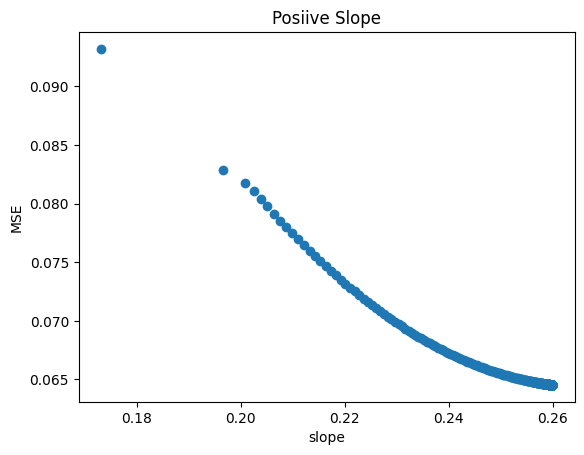

In [18]:
x_slope = [item[0] for item in errors]
y_mse = [item[1] for item in errors]

plt.scatter(x_slope, y_mse)
plt.xlabel('slope')
plt.ylabel('MSE')
plt.title('Posiive Slope')
plt.show()

In [19]:
# Positive Slope
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0])

In [20]:
model = LinearRegressionGradientDescent(0.025, 500)
errors = model.fit(x, y)

pred = model.predict(x)

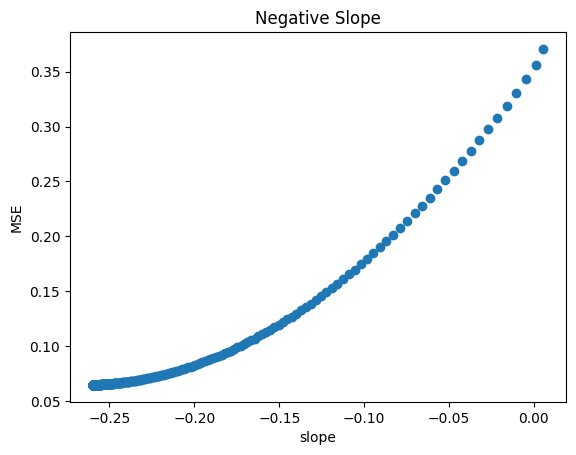

In [21]:
x_slope = [item[0] for item in errors]
y_mse = [item[1] for item in errors]

plt.scatter(x_slope, y_mse)
plt.xlabel('slope')
plt.ylabel('MSE')
plt.title('Negative Slope')
plt.show()